# PART 2

In [1]:
import numpy as np
import scipy.io

In [2]:
# mat = scipy.io.loadmat('/Users/yasinyokus/Desktop/CV HW3 -- 28ARALIK/BSR/BSDS500/data/groundTruth/test/107072.mat')
mat = scipy.io.loadmat('/Users/yasinyokus/Desktop/CV HW3 -- 28ARALIK/BSR/BSDS500/data/groundTruth/train/66039.mat')

In [3]:
# mat['groundTruth'][0, 1][0][0][0] # gray
# mat['groundTruth'][0, 1][0][0][1] # binary
# (mat['groundTruth'][0, 1][0][0][1] != 0).shape

In [4]:
import matplotlib.pyplot as plt
from functools import reduce
import cv2
arr_length = mat['groundTruth'].shape[1]
truths = [mat['groundTruth'][0, i][0][0][1] for i in range(arr_length)]
edge_ground_truth = reduce(np.add, truths) # use this as the edge ground truths

In [5]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from functools import reduce
import cv2

def value_counts(image):
    unique, counts = np.unique(image, return_counts=True)
    return dict(zip(unique, counts))

def get_edge_ground_truth(file_path):
    mat = scipy.io.loadmat(file_path)
    new_mat = np.zeros_like(mat['groundTruth'][0, 0][0][0][1])
    print(new_mat.shape)
    arr_length = mat['groundTruth'].shape[1]
    truths = [mat['groundTruth'][0, i][0][0][1] for i in range(arr_length)]
    edge_ground_truth = reduce(np.logical_or, truths).astype(np.uint8) # use this as the edge ground truths
    return edge_ground_truth


In [9]:
from os import listdir
from os.path import isfile, join
path_name_mat = '/Users/yasinyokus/Desktop/CV HW3 -- 28ARALIK/BSR/BSDS500/data/groundTruth/test/'
path_name_images = '/Users/yasinyokus/Desktop/CV HW3 -- 28ARALIK/PART2/sing_scale_test/'
# mat_files = [join(path_name_mat, f) for f in listdir(path_name_mat) if isfile(join(path_name_mat, f))]
image_files = [f for f in listdir(path_name_images) if isfile(join(path_name_images, f)) and f.endswith('.png')]

(321, 481)
{0: 136452, 1: 17949}
Precision = 0.6915108640727641
(481, 321)
{0: 134016, 1: 20385}
Precision = 0.5973320628870891
(481, 321)
{0: 130808, 1: 23593}
Precision = 0.6008241276521129
(481, 321)
{0: 141723, 1: 12678}
Precision = 0.599212682200234
(321, 481)
{0: 138165, 1: 16236}
Precision = 0.5783296071542638
(481, 321)
{0: 143625, 1: 10776}
Precision = 0.6819753769539355
(321, 481)
{0: 138432, 1: 15969}
Precision = 0.627906976744186
(321, 481)
{0: 141071, 1: 13330}
Precision = 0.7517989720159909
(321, 481)
{0: 134242, 1: 20159}
Precision = 0.5019186492709132
(481, 321)
{0: 140555, 1: 13846}
Precision = 0.7395088591855766
(481, 321)
{0: 141710, 1: 12691}
Precision = 0.7907430395460188
(321, 481)
{0: 128426, 1: 25975}
Precision = 0.5938423782698422
(321, 481)
{0: 140144, 1: 14257}
Precision = 0.761437908496732
(321, 481)
{0: 143911, 1: 10490}
Precision = 0.730273498899717
(481, 321)
{0: 124167, 1: 30234}
Precision = 0.6614864864864864
(481, 321)
{0: 140668, 1: 13733}
Precision =

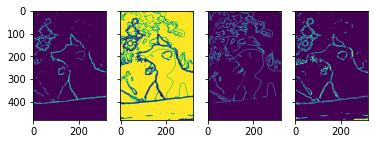

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True)


def helper(image_file_name):
    image_file_path = join(path_name_images, image_file_name)
    file_name_wout_extension = image_file_name[:image_file_name.find('.png')]
    if file_name_wout_extension == -1:
        print("Something went wrong while finding file name!")
        return
    else:
        matrix_file_name = file_name_wout_extension + '.mat'
        mat_file_path = join(path_name_mat, matrix_file_name)
    # finding edge ground truths
    edge_ground_truth = get_edge_ground_truth(mat_file_path)

    # Using PAPER IMAGES
    # paper image results are gray level
    image_file = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)
    # # Otsu's thresholding
    edge_ground_truth_blurred = cv2.GaussianBlur(image_file,(5,5),0)
    _, thresholded_image = cv2.threshold(edge_ground_truth_blurred,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    print(value_counts(thresholded_image))


    return edge_ground_truth, thresholded_image


def calculate_avg_precision(image_files):
    avg_precision = 0
    file_count = len(image_files)
    for image_file_name in image_files:
        edge_ground_truth, paper_image = helper(image_file_name)
        rows, cols = edge_ground_truth.shape

        tpInd = (edge_ground_truth == 1) & (paper_image == 1)
        unique, counts = np.unique(tpInd, return_counts=True)
        tp = dict(zip(unique, counts)).get(True, 0)

        tnInd = (edge_ground_truth == 0) & (paper_image == 0)
        unique, counts = np.unique(tnInd, return_counts=True)
        tn = dict(zip(unique, counts)).get(True, 0)

        fpInd = (edge_ground_truth == 1) & (paper_image == 0)
        unique, counts = np.unique(fpInd, return_counts=True)
        fp = dict(zip(unique, counts)).get(True, 0)

        fnInd = (edge_ground_truth == 0) & (paper_image == 1)
        unique, counts = np.unique(fnInd, return_counts=True)
        fn = dict(zip(unique, counts)).get(True, 0)

        tpImage = np.zeros([rows, cols],dtype=np.uint8)
        tpImage[tpInd] = 255
        tnImage = np.zeros([rows, cols],dtype=np.uint8)
        tnImage[tnInd] = 255
        fpImage = np.zeros([rows, cols],dtype=np.uint8)
        fpImage[fpInd] = 255
        fnImage = np.zeros([rows, cols],dtype=np.uint8) 
        fnImage[fnInd] = 255

        ax1.imshow(tpImage) 
        ax2.imshow(tnImage) 
        ax3.imshow(fpImage) 
        ax4.imshow(fnImage)

        # Compute measures
        # accuracy = (tp + tn) / (tp + tn + fp + fn)
        # sens = tp/(tp + fn) 
        # spec = tn/(tn + fp)
        # print('Accuracy = ' + str(accuracy) + ', sensitivity = ' + str(sens) + ', specificity = ' + str(spec))
        prec = tp/(tp + fp)
        print('Precision = ' + str(prec))
        avg_precision += prec
        # break

    avg_precision /= file_count
    return avg_precision    


avg_precision = calculate_avg_precision(image_files)
print('avg_precision: ', avg_precision)
